In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import calendar
import seaborn as sns
from geopy.distance import great_circle
from math import radians,cos,sin,asin,sqrt

In [101]:
uber_data=pd.read_csv('C:\\Users\\PC\\Desktop\\Thesis\\practice\\uber kaggle\\raw_jul14.csv')
uber_data.head()

,Date/Time,Lat,Lon,Base
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512


In [6]:
uber_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 796121 entries, 0 to 796120
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Date/Time  796121 non-null  object 
 1   Lat        796121 non-null  float64
 2   Lon        796121 non-null  float64
 3   Base       796121 non-null  object 
dtypes: float64(2), object(2)
memory usage: 24.3+ MB


In [25]:
uber_data['Date/Time']=pd.to_datetime(uber_data['Date/Time'])

In [26]:
uber_data['Date/Time']=uber_data['Date/Time'].dt.floor('1H')

In [27]:
uber_data.head(15)

,Date/Time,Lat,Lon,Base
0,2014-07-01 00:00:00,40.7586,-73.9706,B02512
1,2014-07-01 00:00:00,40.7605,-73.9994,B02512
2,2014-07-01 00:00:00,40.7320,-73.9999,B02512
3,2014-07-01 00:00:00,40.7635,-73.9793,B02512
4,2014-07-01 00:00:00,40.7204,-74.0047,B02512
5,2014-07-01 00:00:00,40.7487,-73.9869,B02512
6,2014-07-01 00:00:00,40.7444,-73.9961,B02512
7,2014-07-01 00:00:00,40.7132,-73.9492,B02512
8,2014-07-01 01:00:00,40.7590,-73.9730,B02512
9,2014-07-01 01:00:00,40.7601,-73.9823,B02512


In [28]:
uber_data['Date/Time'].dt.floor('1H').value_counts().sort_index()

2014-07-01 00:00:00     216
2014-07-01 01:00:00     111
2014-07-01 02:00:00      82
2014-07-01 03:00:00     134
2014-07-01 04:00:00     223
                       ... 
2014-07-31 19:00:00    2430
2014-07-31 20:00:00    2460
2014-07-31 21:00:00    2275
2014-07-31 22:00:00    2099
2014-07-31 23:00:00    1382
Name: Date/Time, Length: 744, dtype: int64

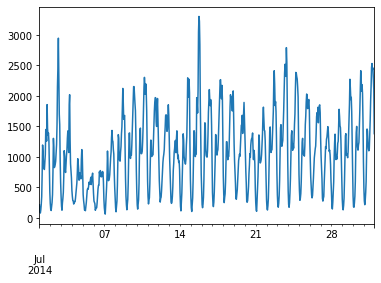

In [29]:
uber_data['Date/Time'].dt.floor('1H').value_counts().sort_index().plot()

In [30]:
hours=uber_data['Date/Time'].dt.hour
weekday=uber_data['Date/Time'].dt.weekday
date=uber_data['Date/Time'].dt.date
weekly_data=pd.concat([hours,weekday,date],axis=1)
weekly_data.columns=['Hours','Weekday','Date']
weekly_data

,Hours,Weekday,Date
0,0,1,2014-07-01
1,0,1,2014-07-01
2,0,1,2014-07-01
3,0,1,2014-07-01
4,0,1,2014-07-01
...,...,...,...
796116,23,3,2014-07-31
796117,23,3,2014-07-31
796118,23,3,2014-07-31
796119,23,3,2014-07-31


In [31]:
weekly_data['Weekday']=weekly_data['Weekday'].apply(lambda x: calendar.day_name[x])
weekly_data.head()

,Hours,Weekday,Date
0,0,Tuesday,2014-07-01
1,0,Tuesday,2014-07-01
2,0,Tuesday,2014-07-01
3,0,Tuesday,2014-07-01
4,0,Tuesday,2014-07-01


In [32]:
weekly_data=weekly_data.groupby(['Date','Weekday','Hours']).size()
weekly_data

Date        Weekday   Hours
2014-07-01  Tuesday   0         216
                      1         111
                      2          82
                      3         134
                      4         223
                               ... 
2014-07-31  Thursday  19       2430
                      20       2460
                      21       2275
                      22       2099
                      23       1382
Length: 744, dtype: int64

In [33]:
weekly_data=weekly_data.reset_index()
weekly_data

,Date,Weekday,Hours,0
0,2014-07-01,Tuesday,0,216
1,2014-07-01,Tuesday,1,111
2,2014-07-01,Tuesday,2,82
3,2014-07-01,Tuesday,3,134
4,2014-07-01,Tuesday,4,223
...,...,...,...,...
739,2014-07-31,Thursday,19,2430
740,2014-07-31,Thursday,20,2460
741,2014-07-31,Thursday,21,2275
742,2014-07-31,Thursday,22,2099


In [34]:
weekly_data=weekly_data.rename(columns={0:'Size'})

In [35]:
weekly_data=weekly_data.groupby(['Weekday','Hours']).mean()['Size']

In [36]:
weekly_data=weekly_data.unstack(level=0)
weekly_data

Weekday,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
Hours,,,,,,,
0,615.00,315.00,1110.25,1090.00,430.0,301.8,354.6
1,385.25,153.25,788.25,829.50,231.4,155.8,193.2
2,264.75,109.75,580.00,638.25,171.0,111.2,156.0
3,307.50,254.75,426.00,477.00,256.6,187.0,224.0
4,339.75,403.75,271.75,245.50,376.8,296.6,326.0
5,497.25,615.25,274.25,231.25,586.2,546.0,559.8
6,736.75,911.00,303.50,256.75,959.2,962.2,1003.4
7,1008.00,1266.50,398.50,316.25,1341.8,1350.0,1425.8
8,1038.00,1199.25,525.25,466.75,1336.6,1332.4,1425.0


In [37]:
weekly_data=weekly_data.reindex(columns=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday'])

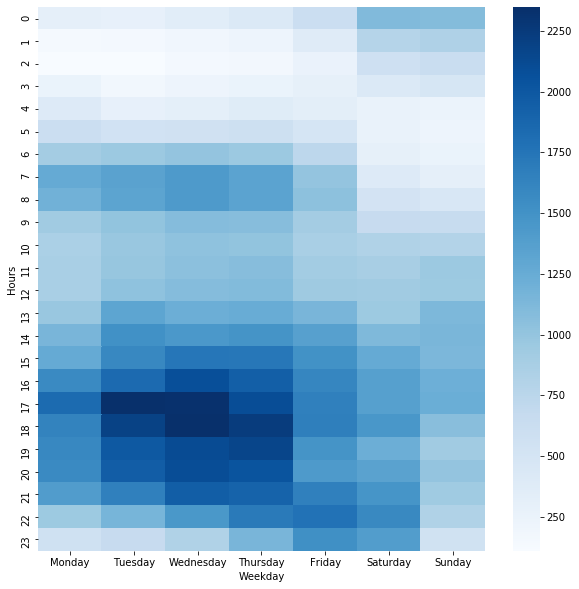

In [38]:
plt.figure(figsize=(10,10))
sns.heatmap(weekly_data,cmap='Blues')
plt.show()

In [97]:
uber_data=uber_data[['Lat','Lon']].apply(lambda x: (tuple(x)),axis=1)

In [99]:
#uber_data=uber_data.reset_index()
uber_data.rename(columns={0:'tuples'})


,index,tuples
0,0,"(40.7586, -73.9706)"
1,1,"(40.7605, -73.9994)"
2,2,"(40.732, -73.9999)"
3,3,"(40.7635, -73.9793)"
4,4,"(40.7204, -74.0047)"
...,...,...
796116,796116,"(40.7285, -73.9846)"
796117,796117,"(40.7615, -73.9868)"
796118,796118,"(40.677, -73.9515)"
796119,796119,"(40.7225, -74.0038)"


In [49]:
def haversine(coor1,coor2):
    lon1=coor1[1]
    lat1=coor1[0]
    lon2=coor2[1]
    lat2=coor2[0]
    lon1,lat1,lon2,lat2=map(radians,[lon1,lat1,lon2,lat2])
    
    dlon=lon2-lon1
    dlat=lat2-lat1
    a=sin(dlat/2)**2+cos(lat2)*sin(dlon/2)**2
    c=2*asin(sqrt(a))
    r=3956
    return c*r          


In [102]:
uber_data['distance from MM']=uber_data[['Lat','Lon']].apply(lambda x: haversine(metro_art_coor,tuple(x)),axis=1)
uber_data['distance from ES']=uber_data[['Lat','Lon']].apply(lambda x: haversine(empire_state_coor,tuple(x)),axis=1)

In [106]:
uber_data

,Date/Time,Lat,Lon,Base,distance from MM,distance from ES
0,7/1/2014 0:03:00,40.7586,-73.9706,B02512,1.503409,1.148623
1,7/1/2014 0:05:00,40.7605,-73.9994,B02512,2.536693,1.172905
2,7/1/2014 0:06:00,40.7320,-73.9999,B02512,3.946702,1.417962
3,7/1/2014 0:09:00,40.7635,-73.9793,B02512,1.463268,1.111250
4,7/1/2014 0:20:00,40.7204,-74.0047,B02512,4.776761,2.245406
...,...,...,...,...,...,...
796116,7/31/2014 23:22:00,40.7285,-73.9846,B02764,3.742389,1.375590
796117,7/31/2014 23:23:00,40.7615,-73.9868,B02764,1.881112,0.906904
796118,7/31/2014 23:29:00,40.6770,-73.9515,B02764,7.105145,5.341535
796119,7/31/2014 23:30:00,40.7225,-74.0038,B02764,4.624931,2.093219


In [107]:
uber_data[['distance from MM','distance from ES']].describe()

,distance from MM,distance from ES
count,796121.000000,796121.000000
mean,4.048561,2.896864
std,3.451011,3.596010
min,0.041577,0.000000
25%,1.938813,1.032936
50%,3.471825,1.787220
75%,4.810800,3.151056
max,99.603339,101.148197


In [51]:
metro_art_coor=(40.7794,-73.9632)
empire_state_coor=(40.7484,-73.9857)

In [110]:
print(uber_data[['distance from MM','distance from ES']]<0.25.sum())

AttributeError: 'float' object has no attribute 'sum'